In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# For PCA and covariance, it's good practice to scale the data first
# This ensures that features with larger values don't dominate the variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a pandas DataFrame for easier handling and display
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

In [4]:
# --- 1. Calculate the Covariance Matrix ---
# There are a few ways to do this:

# Method A: Using pandas DataFrame's .cov() method
# This is straightforward if you have your data in a DataFrame.
cov_matrix_pandas = df_scaled.cov()
print("Covariance Matrix (from pandas):\n", cov_matrix_pandas)

# Method B: Using NumPy's np.cov() function
# NumPy's cov function expects features to be in rows by default.
# So, we need to transpose our scaled data matrix X_scaled.
# rowvar=False indicates that columns represent variables, rows represent observations.
cov_matrix_numpy = np.cov(X_scaled, rowvar=False)
print("\nCovariance Matrix (from NumPy):\n", pd.DataFrame(cov_matrix_numpy, columns=feature_names, index=feature_names)) # Displaying as DataFrame for clarity

# Note: Both methods should yield the same result for scaled data.
# The formula for sample covariance is (Sum of (x_i - mean_x)(y_i - mean_y)) / (n-1)
# When data is scaled (mean=0, std_dev=1), the covariance matrix can be calculated as X^T * X / (n-1)
# where X is the scaled data matrix and n is the number of samples.
# n_samples = X_scaled.shape[0]
# cov_matrix_manual = (X_scaled.T @ X_scaled) / (n_samples - 1)
# print("\nCovariance Matrix (manual from scaled data):\n", pd.DataFrame(cov_matrix_manual, columns=feature_names, index=feature_names))


Covariance Matrix (from pandas):
                                alcohol  malic_acid       ash  \
alcohol                       1.005650    0.094930  0.212740   
malic_acid                    0.094930    1.005650  0.164972   
ash                           0.212740    0.164972  1.005650   
alcalinity_of_ash            -0.311988    0.290130  0.445872   
magnesium                     0.272328   -0.054883  0.288206   
total_phenols                 0.290734   -0.337061  0.129708   
flavanoids                    0.238153   -0.413329  0.115727   
nonflavanoid_phenols         -0.156810    0.294632  0.187283   
proanthocyanins               0.137470   -0.221993  0.009706   
color_intensity               0.549451    0.250392  0.260350   
hue                          -0.072153   -0.564467 -0.075089   
od280/od315_of_diluted_wines  0.072752   -0.370794  0.003933   
proline                       0.647357   -0.193095  0.224890   

                              alcalinity_of_ash  magnesium  total_phe

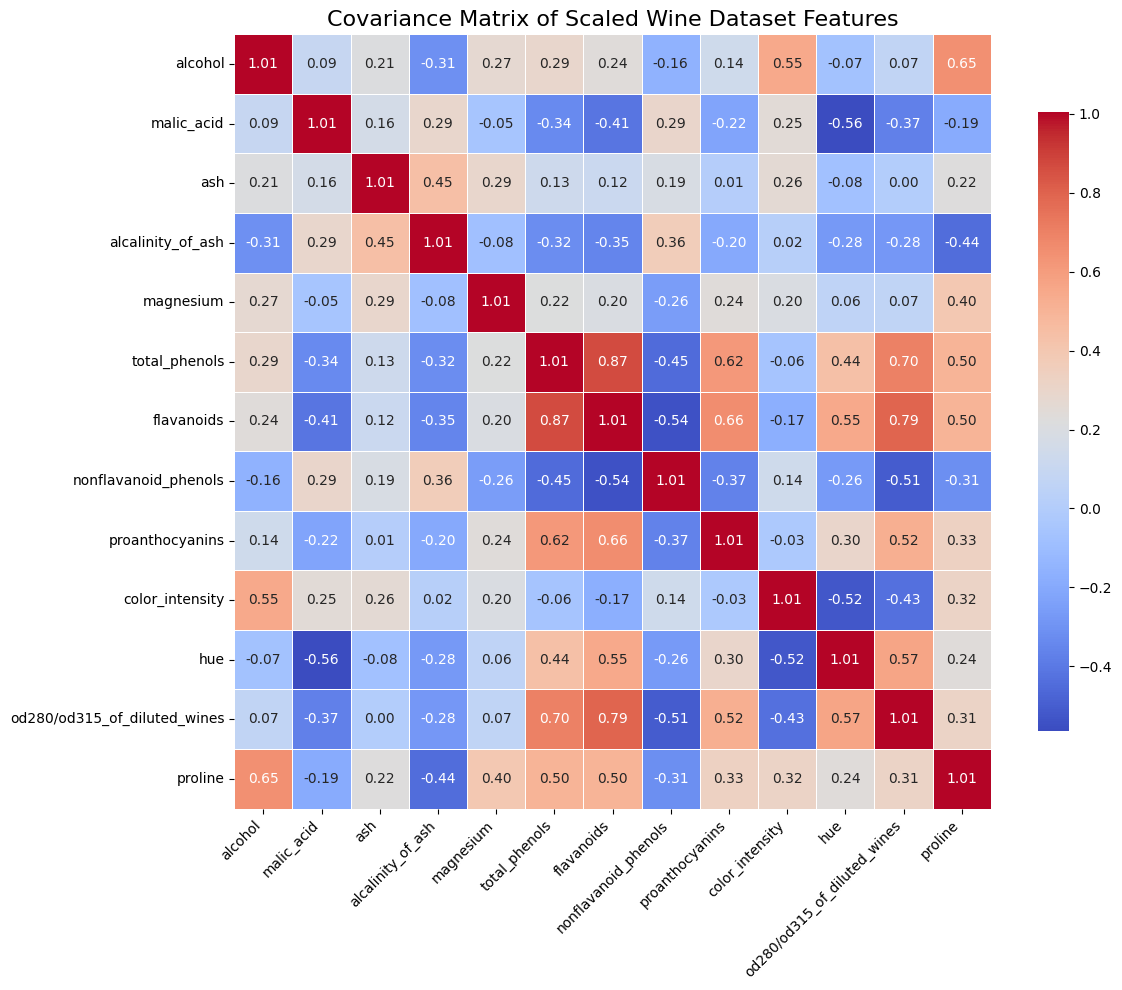

In [5]:
# --- 2. Visualize the Covariance Matrix ---
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix_pandas, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=feature_names, yticklabels=feature_names,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Covariance Matrix of Scaled Wine Dataset Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Explanation of the Visualization
The heatmap displays the covariance between each pair of features in the wine dataset.
- Diagonal Elements: These represent the variance of each feature with itself.
  Since the data is scaled to have a standard deviation of 1, the variance (std_dev^2)
  for each feature should be close to 1 on the diagonal.
- Off-Diagonal Elements: These represent the covariance between two different features.
  - Reddish colors (positive values): Indicate a positive covariance.
    For example, if 'flavanoids' and 'total_phenols' are positively correlated,
    an increase in one tends to be associated with an increase in the other.
  - Bluish colors (negative values): Indicate a negative covariance.
    For example, if 'alcohol' and 'malic_acid' are negatively correlated,
    an increase in one tends to be associated with a decrease in the other.
  - Colors close to white (values near zero): Indicate a low covariance, suggesting
    the features are relatively independent or have a weak linear relationship.

# Role in PCA
In PCA, the next step would be to perform an eigendecomposition on this covariance matrix.
- Eigenvectors: These give the directions of the new feature space (the principal components).
  Each eigenvector is a linear combination of the original features.
- Eigenvalues: These indicate the amount of variance captured by each corresponding eigenvector
  (principal component).
The principal components are ordered by their eigenvalues, from highest to lowest,
so the first principal component captures the most variance, the second captures the
second most, and so on.